In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\kartik\\Downloads\\train (1).csv")

df.head(10)



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
print(df.shape)

(8693, 14)


In [4]:
df.isnull().values.any()

True

In [5]:
print(df.isnull().sum().sort_values(ascending=False))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


In [6]:
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)


df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

df['Age'].fillna(df['Age'].median(), inplace=True)

# Convert categorical variable 'VIP' to numerical (1 for True, 0 for False)
df['VIP'] = df['VIP'].astype(int)

# Convert 'CryoSleep' to integer (assuming it contains numerical values in string format)
df['CryoSleep'] = df['CryoSleep'].astype(int)

# Convert 'Transported' to integers (True=1, False=0)
df['Transported'] = df['Transported'].astype(int)

In [7]:
df = df.drop(columns = ["PassengerId" , "Name" , "Cabin"])



In [8]:
print(df.dtypes)

HomePlanet       object
CryoSleep         int32
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int32
Deck             object
Cabin_num        object
Side             object
dtype: object


In [9]:
df.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
5,Earth,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,1,F,0,P
6,Earth,0,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,1,F,2,S
7,Earth,1,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,1,G,0,S
8,Earth,0,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,1,F,3,S
9,Europa,1,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,1,B,1,P


In [10]:

df = pd.get_dummies(df, columns=["Deck"])

df = pd.get_dummies(df, columns=["Side"])
df = pd.get_dummies(df, columns=["HomePlanet"])
df = pd.get_dummies(df, columns=["Destination"])
df['Cabin_num'] = df['Cabin_num'].astype("Int64")
df.head(10)





,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Deck_G,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,1,1,0,0,0,0,1
5,0,44.0,0,0.0,483.0,0.0,291.0,0.0,1,0,...,0,0,1,0,1,0,0,0,1,0
6,0,26.0,0,42.0,1539.0,3.0,0.0,0.0,1,2,...,0,0,0,1,1,0,0,0,0,1
7,1,28.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,1,1,0,0,0,0,1
8,0,35.0,0,0.0,785.0,17.0,216.0,0.0,1,3,...,0,0,0,1,1,0,0,0,0,1
9,1,14.0,0,0.0,0.0,0.0,0.0,0.0,1,1,...,0,0,1,0,0,1,0,1,0,0


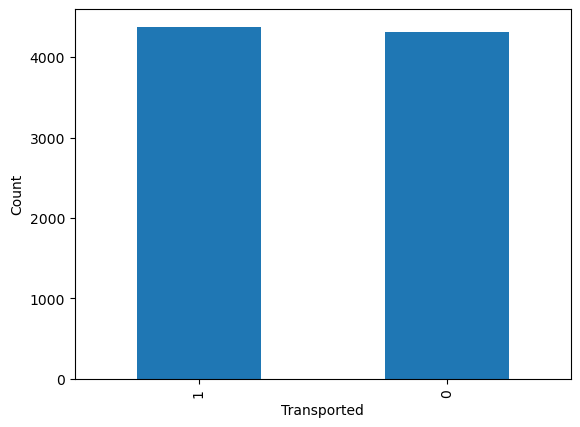

In [11]:

plot_df = df["Transported"].value_counts()
plot_df.plot(kind="bar")
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()



<Axes: xlabel='Age', ylabel='Count'>

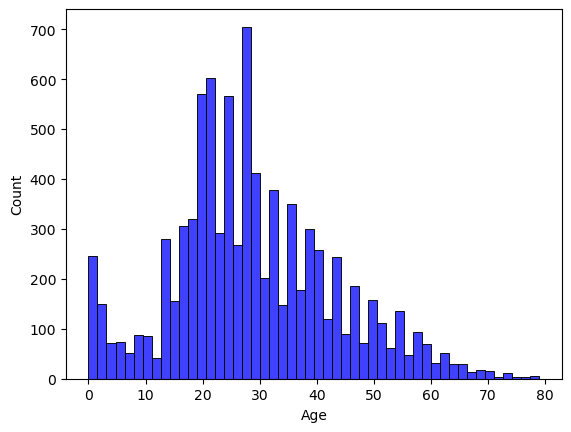

In [12]:
sns.histplot(df['Age'], color='b', bins=50)


<Axes: >

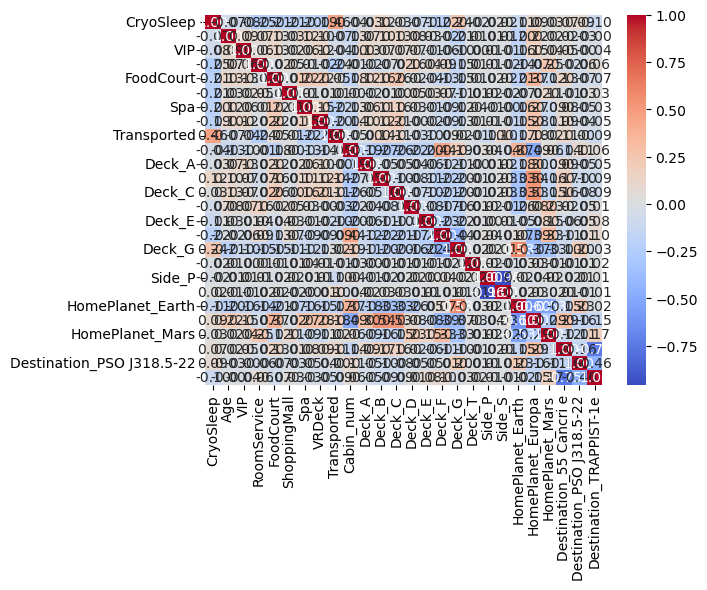

In [13]:
correlation_matrix = df.corr()



sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt=".2f") 

In [14]:
df = df.dropna(axis=0, how='any')
print(df.dtypes)

CryoSleep                      int32
Age                          float64
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int32
Cabin_num                      Int64
Deck_A                         uint8
Deck_B                         uint8
Deck_C                         uint8
Deck_D                         uint8
Deck_E                         uint8
Deck_F                         uint8
Deck_G                         uint8
Deck_T                         uint8
Side_P                         uint8
Side_S                         uint8
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
dtype: object


In [15]:
print(df.isna().sum().T) 

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Cabin_num                    0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64


In [16]:
new2_df = df.drop(['Transported'] , axis =1)


In [17]:
correlation = df.corr().Transported.abs().values[:-1]

associations = {'correlation': correlation} 
associations = pd.DataFrame(associations, index=new2_df.columns).sort_values(by='correlation', ascending=False)
display(associations.style.background_gradient() )

,correlation
Cabin_num,1.000000
CryoSleep,0.458924
RoomService,0.248758
Spa,0.217287
VRDeck,0.206816
HomePlanet_Mars,0.177757
HomePlanet_Europa,0.167844
Deck_C,0.145158
Deck_D,0.111499
Destination_PSO J318.5-22,0.107293


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [19]:
Y = df['Transported']

df = df.drop(['Transported'] , axis=1)

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(df, Y, test_size = 0.3, random_state=0)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(5821, 25)
(5821,)
(2496, 25)
(2496,)


In [22]:
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(X_train)
X_valid_normal = scaler.transform(X_valid)
print(X_train_normal.shape)
print(X_valid_normal.shape)

(5821, 25)
(2496, 25)


In [23]:
random_forest_reg =  RandomForestClassifier(max_depth = 11, n_estimators = 101, random_state = 0)
random_forest_reg.fit(X_train_normal, Y_train)

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=0)

In [24]:
Y_pred_train_rf = random_forest_reg.predict(X_train_normal)
print(Y_pred_train_rf)
Y_pred_valid_rf = random_forest_reg.predict(X_valid_normal)
print(Y_pred_valid_rf)

[0 1 0 ... 1 1 0]
[0 1 1 ... 1 1 0]


HERE ARE THE RESULTS 
90% ACCURACY 

In [25]:
print('ACCURACY VALID', accuracy_score(Y_pred_valid_rf, Y_valid))
print('ROOT MEAN SQUARE ERROR TRAIN', np.sqrt(mean_squared_error(Y_pred_train_rf, Y_train)))
print('ROOT MEAN SQUARE ERROR VALID', np.sqrt(mean_squared_error(Y_pred_valid_rf, Y_valid)))
print('ACCURACY TRAIN', accuracy_score(Y_pred_train_rf, Y_train))

ACCURACY VALID 0.8153044871794872
ROOT MEAN SQUARE ERROR TRAIN 0.31319819787043324
ROOT MEAN SQUARE ERROR VALID 0.4297621584324437
ACCURACY TRAIN 0.9019068888507129


In [26]:
dt= pd.read_csv("C:\\Users\\kartik\\Downloads\\test (1).csv")
dt

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [29]:
dt['HomePlanet'] = dt['HomePlanet'].fillna("Earth")
dt['Destination'] = dt['Destination'].fillna("TRAPPIST-1e")
dt['Cabin'] = dt['Cabin'].fillna("G/3/S")
values = {"CryoSleep": "False", "VIP": "False"}
dt = dt.fillna(value = values)
dt = dt.fillna(0)
dt["CryoSleep"] = dt["CryoSleep"].astype(bool)
dt["VIP"] = dt["VIP"].astype(bool)
dt

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,G/3/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,0.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [30]:
dt.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [31]:
dt[['Deck', 'Cabin_num', 'Side']] = dt['Cabin'].str.split('/', expand=True)


dt[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dt[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

dt['Age'].fillna(dt['Age'].median(), inplace=True)

# Convert categorical variable 'VIP' to numerical (1 for True, 0 for False)
dt['VIP'] = dt['VIP'].astype(int)

# Convert 'CryoSleep' to integer (assuming it contains numerical values in string format)
dt['CryoSleep'] = dt['CryoSleep'].astype(int)

# Convert 'Transported' to integers (True=1, False=0)


In [32]:
dt= dt.drop(columns = [ "Name" , "Cabin"])
dt.head(10)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5,S
5,0027_01,Earth,0,TRAPPIST-1e,31.0,0,0.0,1615.0,263.0,113.0,60.0,F,7,P
6,0029_01,Europa,1,55 Cancri e,21.0,0,0.0,0.0,0.0,0.0,0.0,B,2,P
7,0032_01,Europa,1,TRAPPIST-1e,20.0,0,0.0,0.0,0.0,0.0,0.0,D,0,S
8,0032_02,Europa,1,55 Cancri e,23.0,0,0.0,0.0,0.0,0.0,0.0,D,0,S
9,0033_01,Earth,0,55 Cancri e,24.0,0,0.0,639.0,0.0,0.0,0.0,F,7,S


In [33]:
dt = pd.get_dummies(dt, columns=["Deck"])
dt= dt.drop(columns = [ "PassengerId"])
dt = pd.get_dummies(dt, columns=["Side"])
dt = pd.get_dummies(dt, columns=["HomePlanet"])
dt = pd.get_dummies(dt, columns=["Destination"])
dt['Cabin_num'] = dt['Cabin_num'].astype("Int64")
dt.head(10)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Deck_A,...,Deck_G,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,0,...,0,0,0,1,1,0,0,0,0,1
5,0,31.0,0,0.0,1615.0,263.0,113.0,60.0,7,0,...,0,0,1,0,1,0,0,0,0,1
6,1,21.0,0,0.0,0.0,0.0,0.0,0.0,2,0,...,0,0,1,0,0,1,0,1,0,0
7,1,20.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,0,0,1
8,1,23.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,1,0,0
9,0,24.0,0,0.0,639.0,0.0,0.0,0.0,7,0,...,0,0,0,1,1,0,0,1,0,0


In [34]:

dt.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Deck_A,...,Deck_G,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,0,...,0,0,0,1,1,0,0,0,0,1


In [35]:
X_test = dt
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Deck_A,...,Deck_G,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1496,0,...,1,0,0,1,1,0,0,0,0,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,3,0,...,1,0,0,1,1,0,0,0,0,1
4274,1,0.0,0,0.0,0.0,0.0,0.0,0.0,296,0,...,0,0,1,0,0,0,1,1,0,0
4275,0,0.0,0,0.0,2680.0,0.0,0.0,523.0,297,0,...,0,0,1,0,0,1,0,0,0,1


In [36]:
scaler = MinMaxScaler()
X_test_normal = scaler.fit_transform(X_test)

In [37]:
Y_pred_test_rf = random_forest_reg.predict(X_test_normal)
print(Y_pred_test_rf)

[1 0 1 ... 1 1 1]


It will work as the file present on kAGGLE.COM

In [38]:
dataset_sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission_id = dataset_sample_submission.PassengerId

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/spaceship-titanic/sample_submission.csv'

In [ ]:
predictions = (Y_pred_test_rf > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': predictions.squeeze()})

output.head()